In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat

In [3]:
datos = pd.read_csv("eval_petro.csv")

In [4]:
datos.head()

,PROF,GR,DLL,LLS,FR,DT,NPHI,RHOB,M
0,3895.4964,13.4288,296.4435,152.3448,73.8266,NaN,0.0606,2.5407,0.8381
1,3895.6488,13.5247,306.2799,155.8916,68.3078,NaN,0.0633,2.5486,0.8332
2,3895.8012,13.4533,305.2768,154.7796,68.0374,NaN,0.0645,2.5578,0.8301
3,3895.9536,12.8354,297.0194,150.2632,71.7124,NaN,0.0652,2.5606,0.8290
4,3896.1060,11.6641,283.1093,142.4204,77.3886,NaN,0.0683,2.5554,0.8278


In [5]:
datos['PROF'].head()

0    3895.4964
1    3895.6488
2    3895.8012
3    3895.9536
4    3896.1060
Name: PROF, dtype: float64

In [6]:
datos['DT'] = 189 - (datos['RHOB'] -1)*datos['M']/0.01

In [7]:
#datos['DT']

In [8]:
#datos

In [9]:
datos['N'] = (1 - datos['NPHI'])/(datos['RHOB'] - 1)

In [10]:
datos.head()

,PROF,GR,DLL,LLS,FR,DT,NPHI,RHOB,M,N
0,3895.4964,13.4288,296.4435,152.3448,73.8266,59.873933,0.0606,2.5407,0.8381,0.609723
1,3895.6488,13.5247,306.2799,155.8916,68.3078,59.970648,0.0633,2.5486,0.8332,0.604869
2,3895.8012,13.4533,305.2768,154.7796,68.0374,59.687022,0.0645,2.5578,0.8301,0.600526
3,3895.9536,12.8354,297.0194,150.2632,71.7124,59.626260,0.0652,2.5606,0.8290,0.599000
4,3896.1060,11.6641,283.1093,142.4204,77.3886,60.243988,0.0683,2.5554,0.8278,0.599010


In [11]:
datos['L'] = (189 - datos['DT'])/(1-datos['NPHI'])

In [12]:
#datos['L']

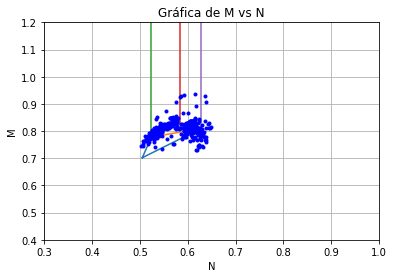

In [13]:
P_inicial=[0.5051,0.5241,0.5848,0.6273,0.6273,0.5051]
P_final  =[0.702,0.7781,0.8269,0.8091,0.8091,0.702]
P_M1=[0.5241,0.6273]
P_M2=[0.7781,0.8091]
v_x1=[0.5241,0.5241]
v_y1=[0.7781,1.2]
v_x2=[0.5848,0.5848]
v_y2=[0.8269,1.2]
v_x3=[0.6273,0.6273]
v_y3=[0.8091,1.2]
plt.plot(P_inicial,P_final,P_M1,P_M2,v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)
plt.plot(datos['N'],datos['M'],marker='.', linestyle='', color='b', label = "M vs N")
#plt.scatter(datos['N'],datos['M'])

#plt.xlim([0.5,0.65])
#plt.ylim([0.7,0.95])
plt.xlim([0.3,1])
plt.ylim([0.4,1.2])
plt.grid()
plt.xlabel('N')
plt.ylabel('M')
plt.title('Gráfica de M vs N')
plt.show()

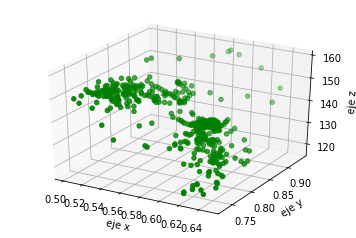

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = datos['N']
Y = datos['M']
Z = datos['L']

ax.scatter(X,Y,Z, c='g',marker = 'o')
#Axes3D.plot(xs = datos['N'], ys = datos['M'], zs = datos['L'] , zdir = 'z')
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_zlabel('eje z')
plt.show()

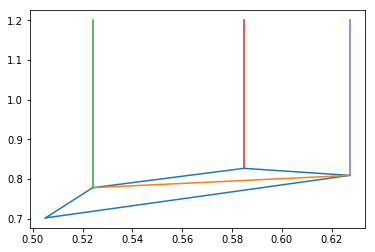

In [15]:
plt.plot(P_inicial,P_final)
plt.plot(P_M1,P_M2)
plt.plot(v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)

##### Vamos a ver como podemos graficar con puntos mas precisos

In [16]:
DOLOMIA = np.array([43.5, 2.87, 0.02])
CALIZA  = np.array([47.6, 2.71, 0.00])
SILICE  = np.array([55.5, 2.65, -0.035])
ARCILLA = np.array([120,  2.35, 0.33])

def param_lito(mineral):
    M = 0.01 * (189-mineral[0])/(mineral[1] - 1)
    N = (1 - mineral[2]) / (mineral[1] - 1)
    L = 0.01 * (189 - mineral[0])/(1 - mineral[2])
    return    np.array([M,N,L])

param_lito(DOLOMIA)
param_lito(CALIZA)
param_lito(SILICE)
param_lito(ARCILLA)

ax = param_lito(DOLOMIA)[1]
ay = param_lito(DOLOMIA)[0]
bx = param_lito(CALIZA)[1]
by = param_lito(CALIZA)[0]
cx = param_lito(SILICE)[1]
cy = param_lito(SILICE)[0]
dx = param_lito(ARCILLA)[1]
dy = param_lito(ARCILLA)[0]
ax,ay
bx,by
cx,cy
dx,dy

(0.49629629629629624, 0.5111111111111111)

In [28]:
#P_inicial=[0.5051,0.5241,0.5848,0.6273,0.6273,0.5051]
P_inicial=[ax,bx,cx,dx,ax]
#P_final  =[0.702,0.7781,0.8269,0.8091,0.8091,0.702]
P_final  =[ay,by,cy,dy,ay]

P_inicial=[ax,bx,cx,dx,ax]
P_final  =[ay,by,cy,dy,ay]
P_M1=[ax,cx]
P_M2=[ay,cy]
v_x1=[ax,ax]
v_y1=[ay,1.2]
v_x2=[bx,bx]
v_y2=[by,1.2]
v_x3=[cx,cx]
v_y3=[cy,1.2]

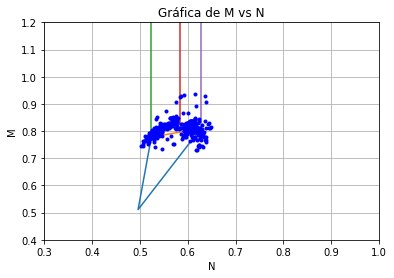

In [29]:
plt.plot(P_inicial,P_final,P_M1,P_M2,v_x1,v_y1,v_x2,v_y2,v_x3,v_y3)
plt.plot(datos['N'],datos['M'],marker='.', linestyle='', color='b', label = "M vs N")
#plt.scatter(datos['N'],datos['M'])

#plt.xlim([0.5,0.65])
#plt.ylim([0.7,0.95])
plt.xlim([0.3,1])
plt.ylim([0.4,1.2])
plt.grid()
plt.xlabel('N')
plt.ylabel('M')
plt.title('Gráfica de M vs N')
plt.show()